In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = pd.read_csv("E:\\Coding\\MachineLearning\\CSVFile\\VN-Index-Historical-Data.csv")

In [3]:
stock

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2021,"1,498.28","1,485.97","1,499.07","1,485.97",875.73K,0.83%
1,12/30/2021,"1,485.97","1,490.96","1,493.38","1,484.82",747.86K,0.01%
2,12/29/2021,"1,485.82","1,494.39","1,498.91","1,485.82",843.88K,-0.57%
3,12/28/2021,"1,494.39","1,488.88","1,499.77","1,483.97",1.00M,0.37%
4,12/27/2021,"1,488.88","1,477.03","1,490.12","1,469.91",752.11K,0.80%
...,...,...,...,...,...,...,...
125,07/07/2021,"1,388.55","1,354.79","1,388.55","1,334.58",733.80K,2.49%
126,07/06/2021,"1,354.79","1,411.13","1,418.99","1,354.79",773.51K,-3.99%
127,07/05/2021,"1,411.13","1,420.27","1,421.52","1,394.12",774.45K,-0.64%
128,07/02/2021,"1,420.27","1,422.89","1,424.28","1,415.82",706.83K,0.23%


In [4]:
stock.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

# Preprocessing data

In [5]:
stock.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,130,130,130,130,130,130,130
unique,130,130,130,127,129,126,106
top,12/31/2021,"1,498.28","1,485.97","1,374.85","1,384.77",1.01M,-0.01%
freq,1,1,1,2,2,3,4


In [6]:
stock.isnull().sum()
stock.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [7]:
stock["Date"] = stock["Date"].str.replace('/', '').astype(int)
stock["Change %"] = stock["Change %"].str.replace('%', '').astype(float)
stock["Price"] = stock["Price"].str.replace(',', '').astype(float)
stock["Open"] = stock["Open"].str.replace(',', '').astype(float)
stock["High"] = stock["High"].str.replace(',', '').astype(float)
stock["Low"] = stock["Low"].str.replace(',', '').astype(float)
stock["Vol."] = stock["Vol."].str.replace('K', '0')
stock["Vol."] = stock["Vol."].str.replace('M', '0000')
stock["Vol."] = stock["Vol."].str.replace('.', '').astype(float)

# stock["Vol."] = 'K', 000    ---> astype(int)
# stock["Vol."] = 'M', 000000 ---> astype(int)

In [8]:
type(stock["Date"])
pd.to_numeric(stock["Date"], errors='raise', downcast=None)

0      12312021
1      12302021
2      12292021
3      12282021
4      12272021
         ...   
125     7072021
126     7062021
127     7052021
128     7022021
129     7012021
Name: Date, Length: 130, dtype: int32

In [9]:
type(stock["Vol."])

pandas.core.series.Series

In [10]:
stock["Vol."]

0       875730.0
1       747860.0
2       843880.0
3      1000000.0
4       752110.0
         ...    
125     733800.0
126     773510.0
127     774450.0
128     706830.0
129     753560.0
Name: Vol., Length: 130, dtype: float64

In [11]:
stock["Date"]

0      12312021
1      12302021
2      12292021
3      12282021
4      12272021
         ...   
125     7072021
126     7062021
127     7052021
128     7022021
129     7012021
Name: Date, Length: 130, dtype: int32

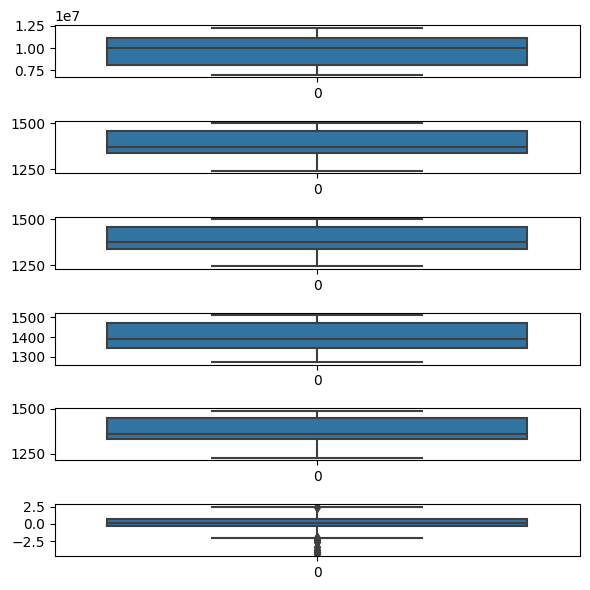

In [13]:
fig, axs = plt.subplots(6, figsize = (6, 6))
plt1 = sns.boxplot(stock['Date'], ax = axs[0])
plt2 = sns.boxplot(stock['Price'], ax = axs[1])
plt3 = sns.boxplot(stock['Open'], ax = axs[2])
plt4 = sns.boxplot(stock['High'], ax = axs[3])
plt5 = sns.boxplot(stock['Low'], ax = axs[4])
plt7 = sns.boxplot(stock['Change %'], ax = axs[5])
plt.tight_layout()

In [14]:
features = ['Date' ,'Price', 'Open', 'High', 'Low']

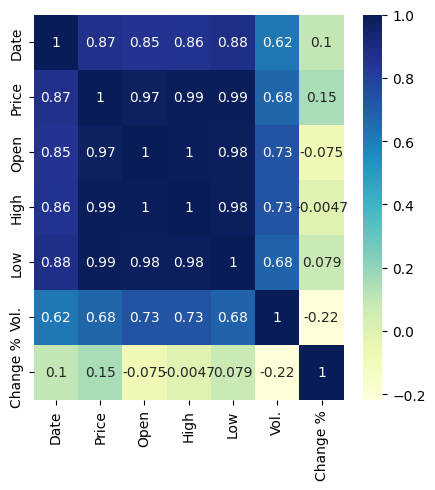

In [15]:
plt.figure(figsize=(5, 5))
sns.heatmap(stock.corr(), cmap="YlGnBu", annot = True)
plt.show()

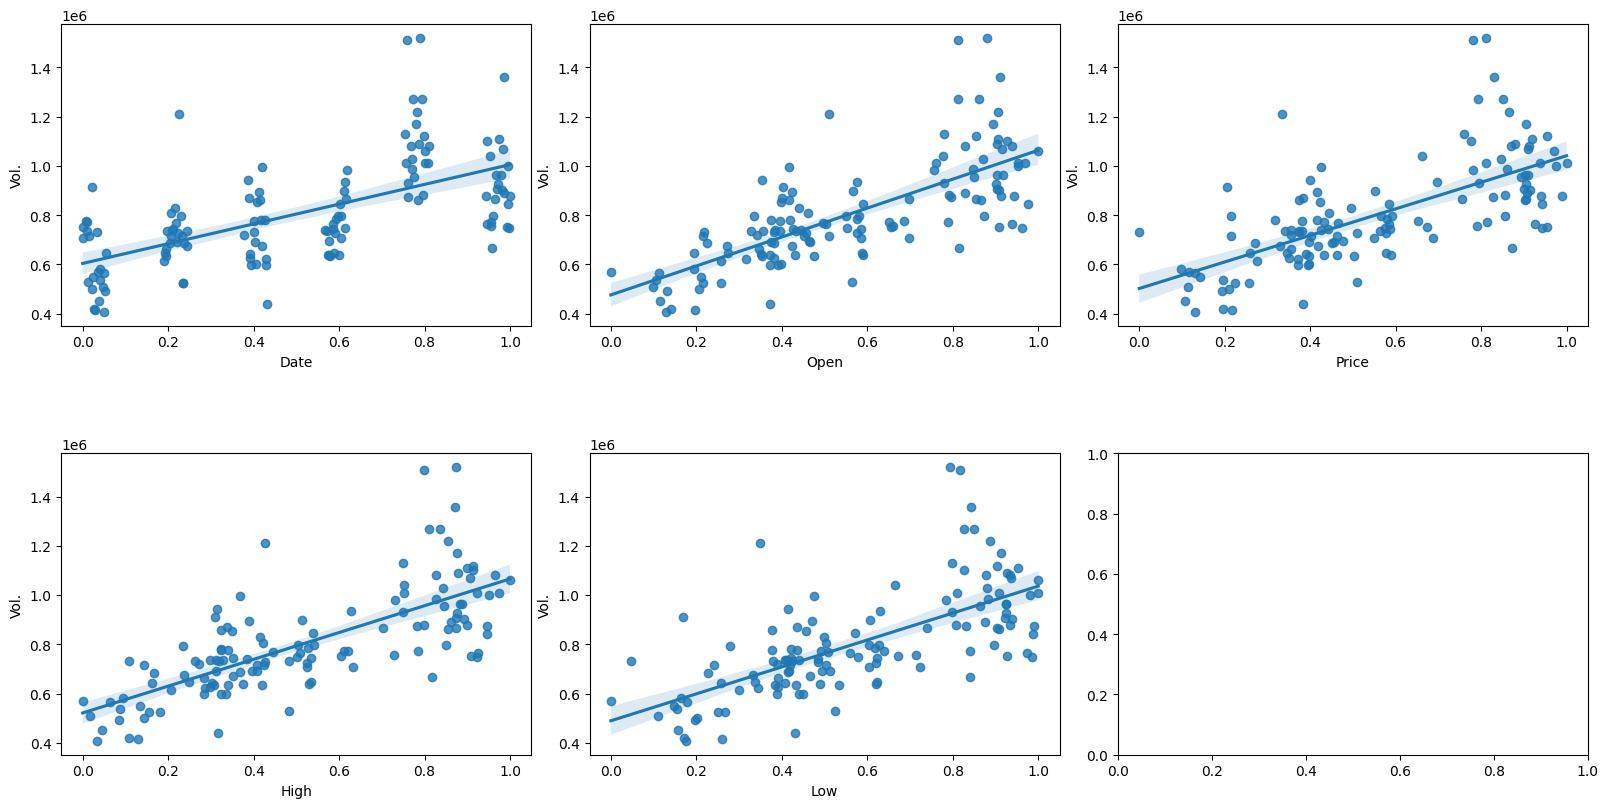

In [16]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Date', 'Open', 'Price', 'High', 'Low']
x = stock.loc[:,column_sels]
y = stock['Vol.']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

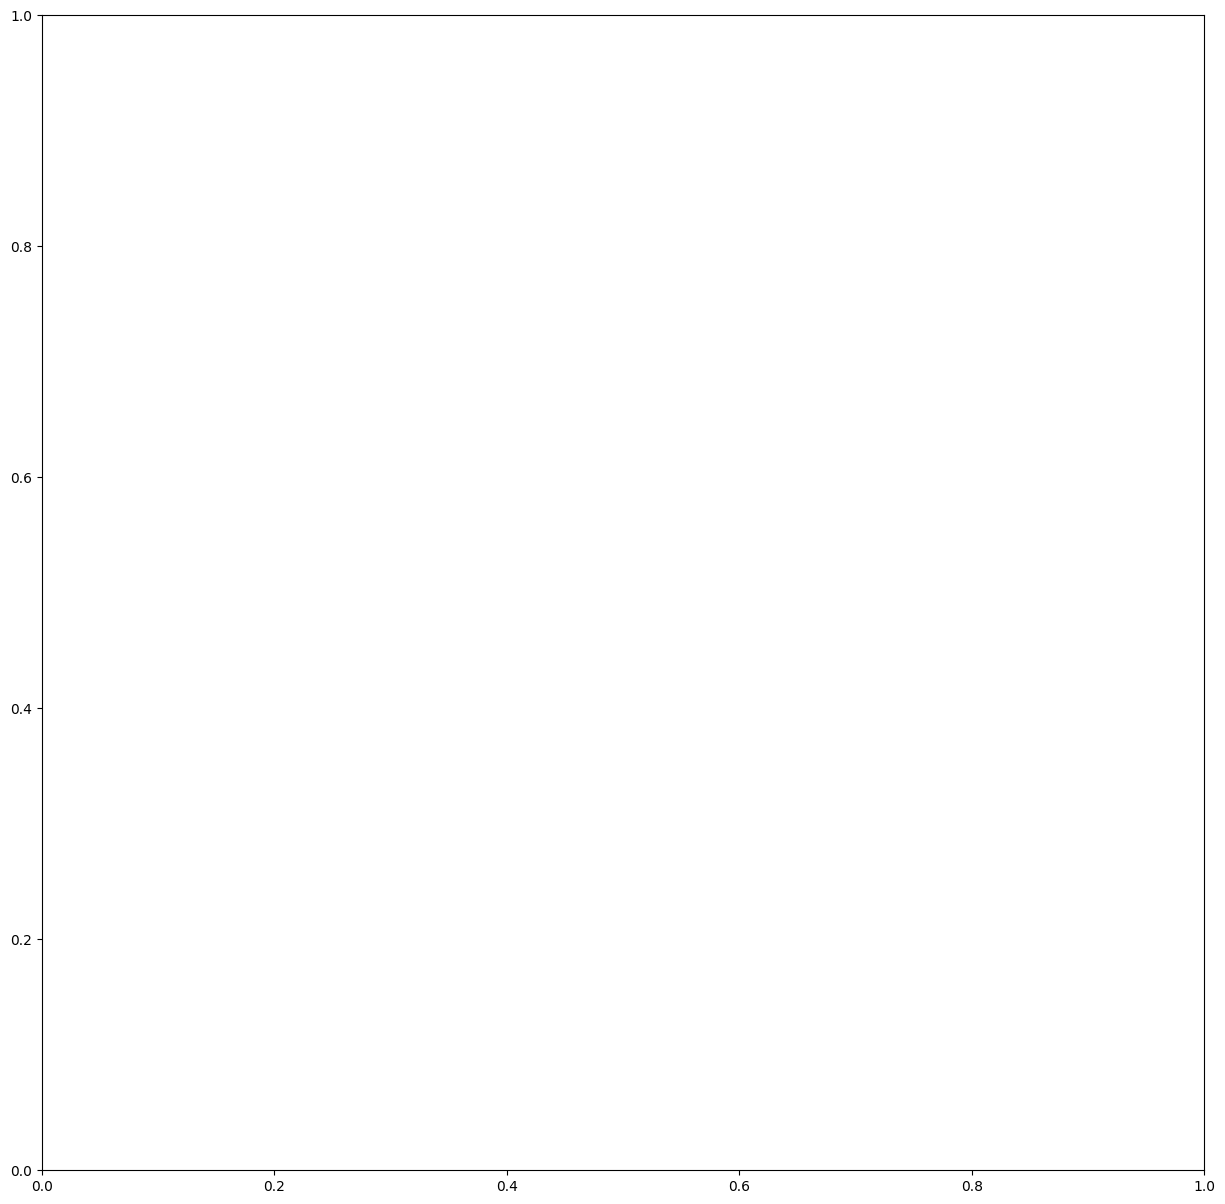

In [17]:
fig, axes = plt.subplots(1, figsize=(15, 15))

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
x = stock['Open']
x

0      1485.97
1      1490.96
2      1494.39
3      1488.88
4      1477.03
        ...   
125    1354.79
126    1411.13
127    1420.27
128    1422.89
129    1412.15
Name: Open, Length: 130, dtype: float64

In [20]:
y = stock['Vol.']

In [21]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [22]:
x

array([[1485.97],
       [1490.96],
       [1494.39],
       [1488.88],
       [1477.03],
       [1456.96],
       [1477.67],
       [1478.74],
       [1477.33],
       [1479.79],
       [1476.61],
       [1475.5 ],
       [1476.02],
       [1476.21],
       [1463.54],
       [1467.98],
       [1452.87],
       [1446.77],
       [1413.58],
       [1443.32],
       [1482.05],
       [1485.19],
       [1478.44],
       [1484.84],
       [1493.03],
       [1500.81],
       [1488.87],
       [1463.63],
       [1447.25],
       [1452.35],
       [1469.83],
       [1475.85],
       [1466.45],
       [1476.57],
       [1473.37],
       [1462.35],
       [1465.02],
       [1461.5 ],
       [1467.57],
       [1456.51],
       [1448.34],
       [1444.3 ],
       [1452.46],
       [1438.97],
       [1444.27],
       [1438.01],
       [1423.02],
       [1391.63],
       [1385.4 ],
       [1389.24],
       [1384.77],
       [1393.8 ],
       [1395.33],
       [1395.53],
       [1392.7 ],
       [13

In [23]:
y

array([[ 875730.],
       [ 747860.],
       [ 843880.],
       [1000000.],
       [ 752110.],
       [ 889480.],
       [1360000.],
       [1070000.],
       [ 902840.],
       [ 963350.],
       [1110000.],
       [ 927540.],
       [ 906080.],
       [ 964110.],
       [ 865580.],
       [ 798290.],
       [ 665460.],
       [ 771030.],
       [ 755910.],
       [1040000.],
       [1100000.],
       [ 763960.],
       [ 876730.],
       [1080000.],
       [1010000.],
       [1060000.],
       [1010000.],
       [1120000.],
       [ 880070.],
       [1270000.],
       [1520000.],
       [1090000.],
       [ 860800.],
       [1220000.],
       [1170000.],
       [ 955630.],
       [1270000.],
       [ 985540.],
       [1030000.],
       [1080000.],
       [ 874070.],
       [ 929530.],
       [1510000.],
       [1010000.],
       [1130000.],
       [ 982010.],
       [ 865430.],
       [ 936220.],
       [ 747950.],
       [ 899260.],
       [ 798130.],
       [ 709070.],
       [ 845

In [24]:
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[1.00000000e+00, 1.48597000e+03, 2.20810684e+06, 3.28118052e+09],
       [1.00000000e+00, 1.49096000e+03, 2.22296172e+06, 3.31434701e+09],
       [1.00000000e+00, 1.49439000e+03, 2.23320147e+06, 3.33727395e+09],
       [1.00000000e+00, 1.48888000e+03, 2.21676365e+06, 3.30049507e+09],
       [1.00000000e+00, 1.47703000e+03, 2.18161762e+06, 3.22231467e+09],
       [1.00000000e+00, 1.45696000e+03, 2.12273244e+06, 3.09273626e+09],
       [1.00000000e+00, 1.47767000e+03, 2.18350863e+06, 3.22650520e+09],
       [1.00000000e+00, 1.47874000e+03, 2.18667199e+06, 3.23351933e+09],
       [1.00000000e+00, 1.47733000e+03, 2.18250393e+06, 3.22427853e+09],
       [1.00000000e+00, 1.47979000e+03, 2.18977844e+06, 3.24041224e+09],
       [1.00000000e+00, 1.47661000e+03, 2.18037709e+06, 3.21956662e+09],
       [1.00000000e+00, 1.47550000e+03, 2.17710025e+06, 3.21231142e+09],
       [1.00000000e+00, 1.47602000e+03, 2.17863504e+06, 3.21570889e+09],
       [1.00000000e+00, 1.47621000e+03, 2.17919596e

In [25]:
x_poly.shape

(130, 4)

In [26]:
x_poly[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
x_poly[:,1] 

array([1485.97, 1490.96, 1494.39, 1488.88, 1477.03, 1456.96, 1477.67,
       1478.74, 1477.33, 1479.79, 1476.61, 1475.5 , 1476.02, 1476.21,
       1463.54, 1467.98, 1452.87, 1446.77, 1413.58, 1443.32, 1482.05,
       1485.19, 1478.44, 1484.84, 1493.03, 1500.81, 1488.87, 1463.63,
       1447.25, 1452.35, 1469.83, 1475.85, 1466.45, 1476.57, 1473.37,
       1462.35, 1465.02, 1461.5 , 1467.57, 1456.51, 1448.34, 1444.3 ,
       1452.46, 1438.97, 1444.27, 1438.01, 1423.02, 1391.63, 1385.4 ,
       1389.24, 1384.77, 1393.8 , 1395.33, 1395.53, 1392.7 , 1391.85,
       1391.91, 1394.8 , 1394.09, 1372.73, 1365.99, 1362.82, 1354.63,
       1339.54, 1334.89, 1342.06, 1339.21, 1339.31, 1324.99, 1351.17,
       1352.76, 1350.68, 1339.84, 1350.48, 1352.64, 1345.87, 1345.83,
       1339.7 , 1341.43, 1345.31, 1343.98, 1333.61, 1341.9 , 1346.39,
       1334.65, 1331.47, 1328.14, 1313.2 , 1301.12, 1309.55, 1298.74,
       1298.86, 1329.43, 1374.85, 1360.94, 1363.09, 1370.96, 1357.05,
       1353.05, 1357

In [28]:
x_poly[:,2]

array([2208106.8409, 2222961.7216, 2233201.4721, 2216763.6544,
       2181617.6209, 2122732.4416, 2183508.6289, 2186671.9876,
       2182503.9289, 2189778.4441, 2180377.0921, 2177100.25  ,
       2178635.0404, 2179195.9641, 2141949.3316, 2154965.2804,
       2110831.2369, 2093143.4329, 1998208.4164, 2083172.6224,
       2196472.2025, 2205789.3361, 2185784.8336, 2204749.8256,
       2229138.5809, 2252430.6561, 2216733.8769, 2142212.7769,
       2094532.5625, 2109320.5225, 2160400.2289, 2178133.2225,
       2150475.6025, 2180258.9649, 2170819.1569, 2138467.5225,
       2146283.6004, 2135982.25  , 2153761.7049, 2121421.3801,
       2097688.7556, 2086002.49  , 2109640.0516, 2070634.6609,
       2085915.8329, 2067872.7601, 2024985.9204, 1936634.0569,
       1919333.16  , 1929987.7776, 1917587.9529, 1942678.44  ,
       1946945.8089, 1947503.9809, 1939613.29  , 1937246.4225,
       1937413.4481, 1945467.04  , 1943486.9281, 1884387.6529,
       1865928.6801, 1857278.3524, 1835022.4369, 179436

In [29]:
x_poly[:,3]

array([3.28118052e+09, 3.31434701e+09, 3.33727395e+09, 3.30049507e+09,
       3.22231467e+09, 3.09273626e+09, 3.22650520e+09, 3.23351933e+09,
       3.22427853e+09, 3.24041224e+09, 3.21956662e+09, 3.21231142e+09,
       3.21570889e+09, 3.21695087e+09, 3.13482852e+09, 3.16344593e+09,
       3.06676338e+09, 3.02829712e+09, 2.82462745e+09, 3.00668471e+09,
       3.25528163e+09, 3.27601626e+09, 3.23155173e+09, 3.27370073e+09,
       3.32817078e+09, 3.38047045e+09, 3.30042857e+09, 3.13540689e+09,
       3.03131225e+09, 3.06347166e+09, 3.17542107e+09, 3.21459792e+09,
       3.15356495e+09, 3.21930498e+09, 3.19841982e+09, 3.12718798e+09,
       3.14434840e+09, 3.12173806e+09, 3.16079607e+09, 3.08987145e+09,
       3.03816653e+09, 3.01281340e+09, 3.06416779e+09, 2.97958116e+09,
       3.01262566e+09, 2.97362171e+09, 2.88159546e+09, 2.69507805e+09,
       2.65904416e+09, 2.68121622e+09, 2.65541827e+09, 2.70770521e+09,
       2.71663190e+09, 2.71780023e+09, 2.70129943e+09, 2.69635643e+09,
      

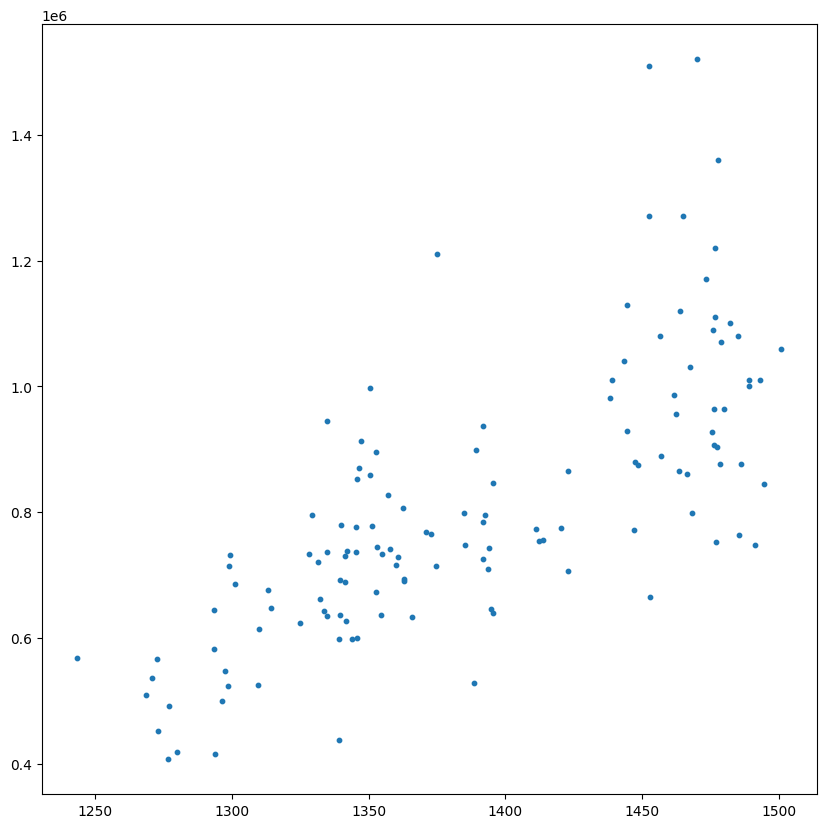

In [30]:
fig, axes = plt.subplots(1, figsize=(10, 10))
axes.scatter(x, y, s = 10) 

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [32]:
column_sels = ['Date', 'Open', 'Price', 'High', 'Low']
x = stock.loc[:,column_sels]

In [33]:
x

,Date,Open,Price,High,Low
0,12312021,1485.97,1498.28,1499.07,1485.97
1,12302021,1490.96,1485.97,1493.38,1484.82
2,12292021,1494.39,1485.82,1498.91,1485.82
3,12282021,1488.88,1494.39,1499.77,1483.97
4,12272021,1477.03,1488.88,1490.12,1469.91
...,...,...,...,...,...
125,7072021,1354.79,1388.55,1388.55,1334.58
126,7062021,1411.13,1354.79,1418.99,1354.79
127,7052021,1420.27,1411.13,1421.52,1394.12
128,7022021,1422.89,1420.27,1424.28,1415.82


In [34]:
y

array([[ 875730.],
       [ 747860.],
       [ 843880.],
       [1000000.],
       [ 752110.],
       [ 889480.],
       [1360000.],
       [1070000.],
       [ 902840.],
       [ 963350.],
       [1110000.],
       [ 927540.],
       [ 906080.],
       [ 964110.],
       [ 865580.],
       [ 798290.],
       [ 665460.],
       [ 771030.],
       [ 755910.],
       [1040000.],
       [1100000.],
       [ 763960.],
       [ 876730.],
       [1080000.],
       [1010000.],
       [1060000.],
       [1010000.],
       [1120000.],
       [ 880070.],
       [1270000.],
       [1520000.],
       [1090000.],
       [ 860800.],
       [1220000.],
       [1170000.],
       [ 955630.],
       [1270000.],
       [ 985540.],
       [1030000.],
       [1080000.],
       [ 874070.],
       [ 929530.],
       [1510000.],
       [1010000.],
       [1130000.],
       [ 982010.],
       [ 865430.],
       [ 936220.],
       [ 747950.],
       [ 899260.],
       [ 798130.],
       [ 709070.],
       [ 845

In [35]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [36]:
x

,Date,Open,Price,High,Low
0,12312021,1485.97,1498.28,1499.07,1485.97
1,12302021,1490.96,1485.97,1493.38,1484.82
2,12292021,1494.39,1485.82,1498.91,1485.82
3,12282021,1488.88,1494.39,1499.77,1483.97
4,12272021,1477.03,1488.88,1490.12,1469.91
...,...,...,...,...,...
125,7072021,1354.79,1388.55,1388.55,1334.58
126,7062021,1411.13,1354.79,1418.99,1354.79
127,7052021,1420.27,1411.13,1421.52,1394.12
128,7022021,1422.89,1420.27,1424.28,1415.82


In [37]:
x = stock['Open']

In [38]:
x

0      1485.97
1      1490.96
2      1494.39
3      1488.88
4      1477.03
        ...   
125    1354.79
126    1411.13
127    1420.27
128    1422.89
129    1412.15
Name: Open, Length: 130, dtype: float64

In [39]:
x = x[:, np.newaxis]

In [40]:
y

array([[13.68281425],
       [13.52497241],
       [13.64576677],
       [13.81551156],
       [13.5306392 ],
       [13.69839343],
       [14.12299599],
       [13.88317014],
       [13.71330174],
       [13.77817311],
       [13.91987147],
       [13.74029228],
       [13.71688399],
       [13.77896171],
       [13.67115624],
       [13.59022847],
       [13.40823531],
       [13.55548386],
       [13.53567892],
       [13.85473223],
       [13.91082165],
       [13.54627202],
       [13.6839555 ],
       [13.89247253],
       [13.82546188],
       [13.87378041],
       [13.82546188],
       [13.92884014],
       [13.68775787],
       [14.05452825],
       [14.23422155],
       [13.90168917],
       [13.66561863],
       [14.01436224],
       [13.97251516],
       [13.77012713],
       [14.05452825],
       [13.80094601],
       [13.84507033],
       [13.89247253],
       [13.68091689],
       [13.74243544],
       [14.22762087],
       [13.82546188],
       [13.93772908],
       [13

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
#applying polynomial regression degree 3
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

In [43]:
x.shape

(130, 1)

In [44]:
y.shape

(130, 1)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree): 
    X_new=np.linspace(0, 40, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.plot(x_train, y_train, "b.",label='Training points')
    plt.plot(x_test, y_test, "g.",label='Testing points')
    axes.scatter(x, y, s=10)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([1400, 1500, 0, 20])
    plt.show()

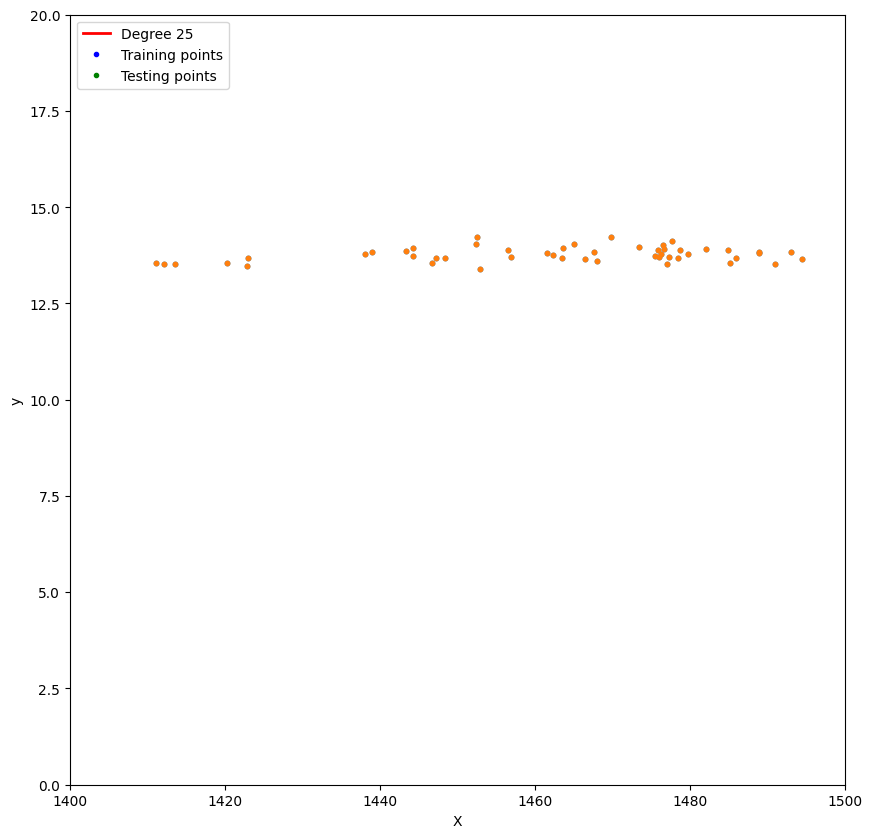

In [46]:
fig, axes = plt.subplots(1, figsize=(10, 10))
axes.scatter(x, y, s=10)
polynomial_regression(25)

In [47]:
x_train

array([[1293.67],
       [1314.22],
       [1456.96],
       [1444.3 ],
       [1332.44],
       [1395.53],
       [1374.68],
       [1452.35],
       [1485.19],
       [1452.87],
       [1350.68],
       [1463.63],
       [1462.35],
       [1354.79],
       [1357.79],
       [1357.05],
       [1298.86],
       [1422.89],
       [1342.06],
       [1484.84],
       [1279.91],
       [1268.83],
       [1352.64],
       [1293.6 ],
       [1293.92],
       [1372.73],
       [1339.7 ],
       [1362.43],
       [1313.2 ],
       [1490.96],
       [1413.58],
       [1391.91],
       [1443.32],
       [1362.82],
       [1309.55],
       [1477.67],
       [1272.71],
       [1392.7 ],
       [1479.79],
       [1365.99],
       [1296.3 ],
       [1448.34],
       [1476.61],
       [1341.43],
       [1488.87],
       [1466.45],
       [1411.13],
       [1354.63],
       [1394.8 ],
       [1350.48],
       [1420.27],
       [1446.77],
       [1333.61],
       [1412.15],
       [1353.05],
       [14

In [48]:
y_train

array([[ 582250.],
       [ 647010.],
       [ 889480.],
       [ 929530.],
       [ 661800.],
       [ 639440.],
       [ 713990.],
       [1270000.],
       [ 763960.],
       [ 665460.],
       [ 997610.],
       [1120000.],
       [ 955630.],
       [ 733800.],
       [ 741560.],
       [ 827710.],
       [ 714270.],
       [ 706830.],
       [ 738170.],
       [1080000.],
       [ 419140.],
       [ 508550.],
       [ 895460.],
       [ 644440.],
       [ 415120.],
       [ 764350.],
       [ 692090.],
       [ 806770.],
       [ 676540.],
       [ 747860.],
       [ 755910.],
       [ 725510.],
       [1040000.],
       [ 693030.],
       [ 524290.],
       [1360000.],
       [ 566750.],
       [ 795920.],
       [ 963350.],
       [ 632860.],
       [ 500180.],
       [ 874070.],
       [1110000.],
       [ 730450.],
       [1010000.],
       [ 860800.],
       [ 773510.],
       [ 637000.],
       [ 645350.],
       [ 859680.],
       [ 774450.],
       [ 771030.],
       [ 642

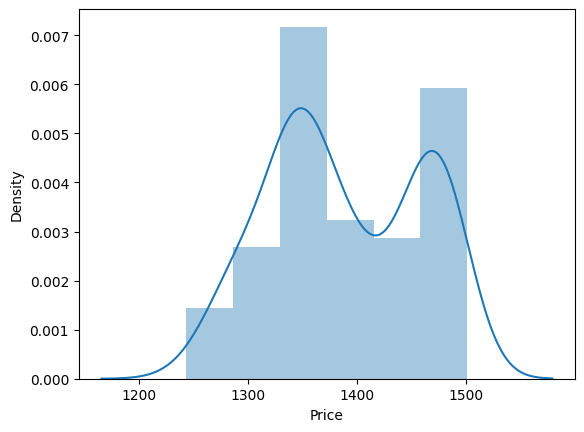

In [50]:
sns_plot = sns.distplot(stock['Price'])

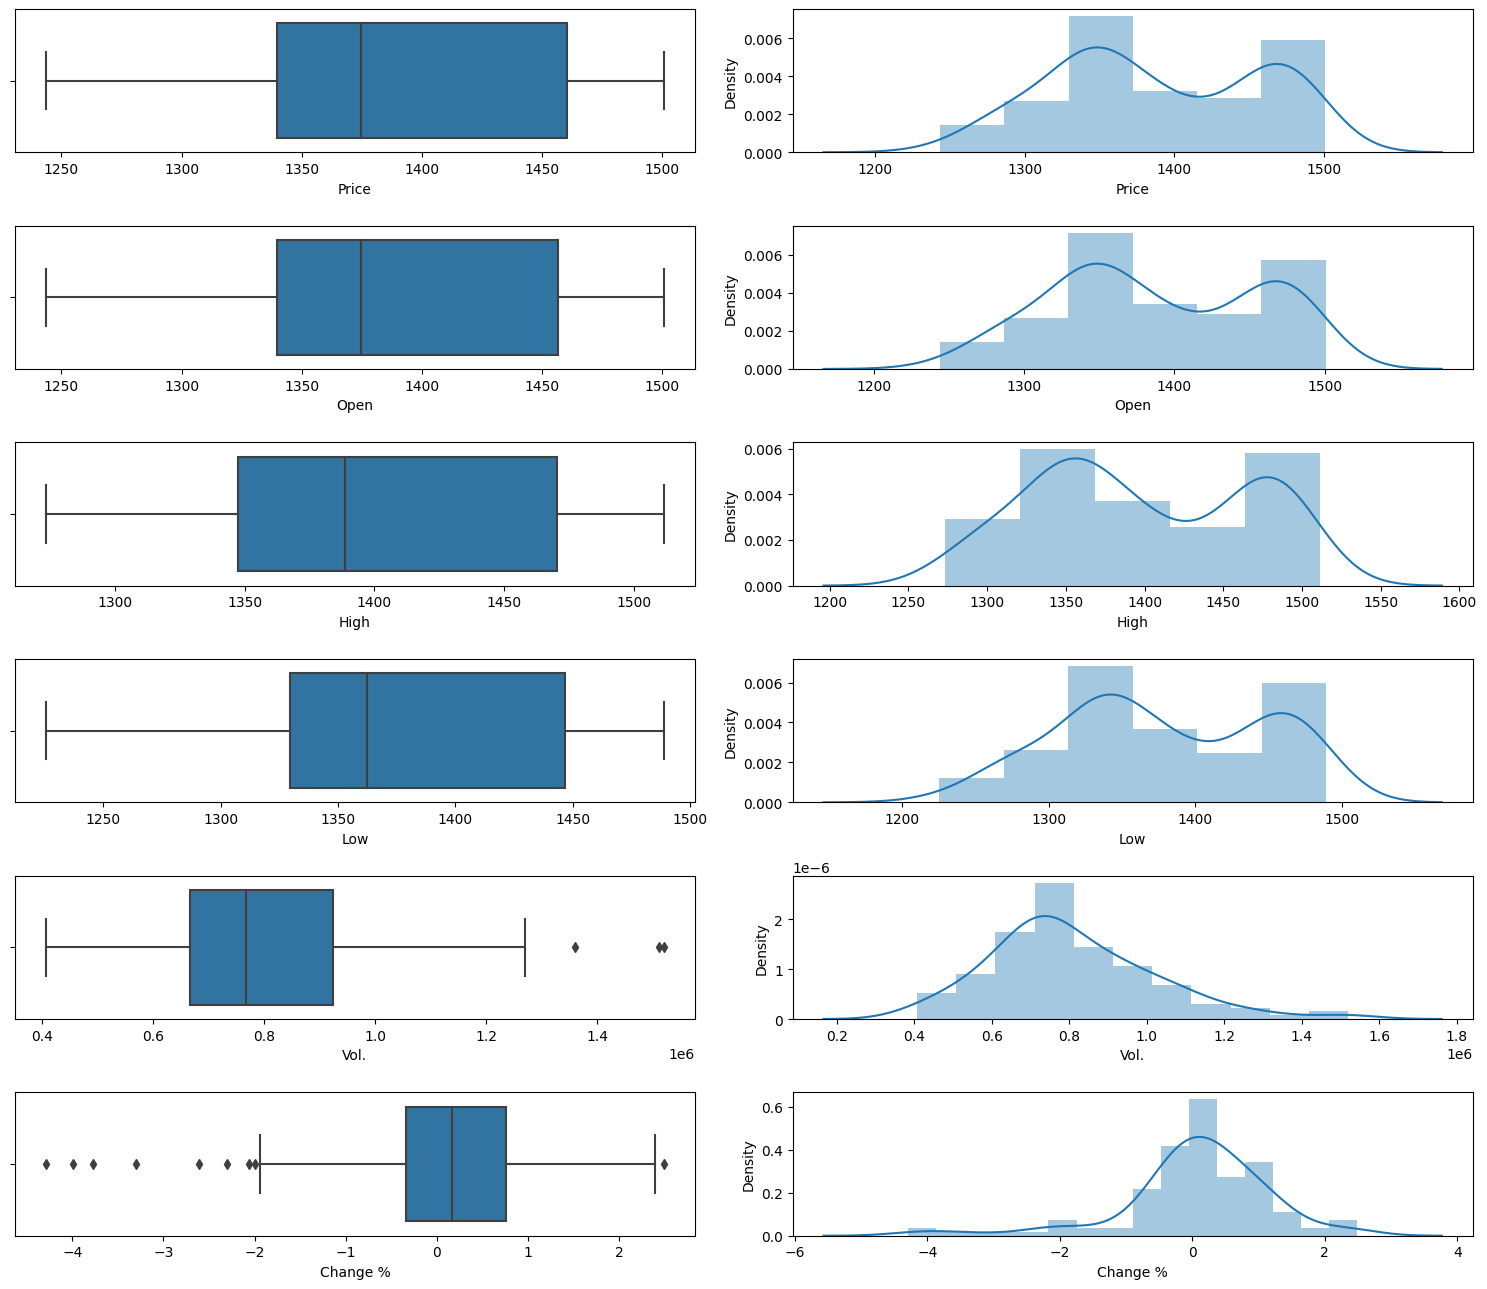

In [51]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= stock["Price"], ax = ax[0,0])
sns.distplot(stock['Price'], ax = ax[0,1])
sns.boxplot(x= stock["Open"], ax = ax[1,0])
sns.distplot(stock['Open'], ax = ax[1,1])
sns.boxplot(x= stock["High"], ax = ax[2,0])
sns.distplot(stock['High'], ax = ax[2,1])
sns.boxplot(x= stock["Low"], ax = ax[3,0])
sns.distplot(stock['Low'], ax = ax[3,1])
sns.boxplot(x= stock["Vol."], ax = ax[4,0])
sns.distplot(stock['Vol.'], ax = ax[4,1])
sns.boxplot(x= stock["Change %"], ax = ax[5,0])
sns.distplot(stock['Change %'], ax = ax[5,1])
plt.tight_layout()

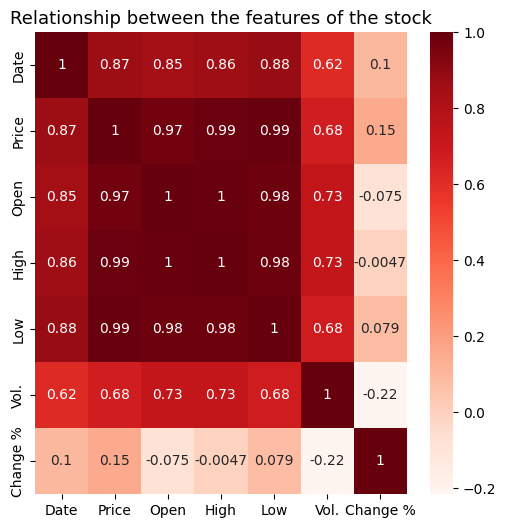

In [52]:
plt.figure(figsize=(6,6))
sns.heatmap(stock.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Relationship between the features of the stock',
         fontsize=13)
plt.show()